### Predicting Diabetes with Logistic Regression
`Classification Problem`

### Overview
The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.

In [1]:
# Import Required modules
#% matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Import ml model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

C:\Users\GOVINDA\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Data Description
<ul><li>We have our data saved in a CSV file called `diabetes.csv`.</li><li>We first read our dataset into a pandas dataframe called df_diabetes </li><li>use the `head()` function to show the first five records from our dataset.</li></ul>

In [2]:
df_diabetes=pd.read_csv('datasets_228_482_diabetes.csv')
df_diabetes=df_diabetes.drop('OutcomeLabel',axis=1)
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,0,48,20,0,24.7,0.140,22,0
1,1,0,74,20,23,27.7,0.299,21,0
2,5,0,80,32,0,41.0,0.346,37,1
3,1,0,68,35,0,32.0,0.389,22,0
4,6,0,68,41,0,39.0,0.727,41,1


### The following features have been provided to help us predict whether a person is diabetic or not:
<ul>
    <li><h4>Pregnancies:</h4> Number of times pregnant</li>
    <li><h4>Glucose:</h4> Plasma glucose concentration over 2 hours in an oral glucose tolerance test</li>
    <li><h4>BloodPressure:</h4> Diastolic blood pressure (mm Hg)</li>
    <li><h4>SkinThickness:</h4> Triceps skin fold thickness (mm)</li>
    <li><h4>Insulin:</h4> 2-Hour serum insulin (mu U/ml)</li>
    <li><h4>BMI:</h4> Body mass index (weight in kg/(height in m)2)</li>
    <li><h4>DiabetesPedigreeFunction:</h4> Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)</li>
    <li><h4>Age:</h4> Age (years)</li>
    <li><h4>Outcome:</h4> Class variable (0 if non-diabetic, 1 if diabetic)</li>
</ul>
Let’s also make sure that our data is clean (has no null values, etc).

In [3]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Data Exploration
Let us now explore our data set to get a feel of what it looks like and get some insights about it.

Let’s start by finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap.

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

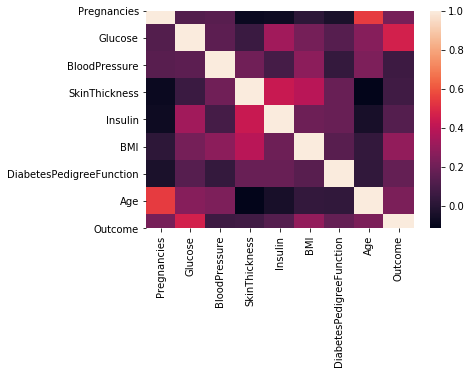

In [4]:
corr=df_diabetes.corr()
print(corr)
# Create heatmap with seaborn
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

### In the above heatmap, brighter colors indicate more correlation. As we can see from the table and the heatmap, glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable. Also notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.

#### Let’s also look at how many people in the dataset are diabetic and how many are not. Below is the barplot of the same:

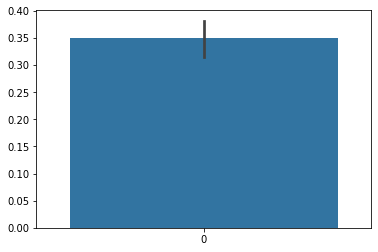

In [5]:
sns.barplot(data=df_diabetes['Outcome'])

### Dataset Preparation (splitting and normalization)
The data set consists of record of 767 patients in total. To train our model we will be using 650 records. We will be using 100 records for testing, and the last 17 records to cross check our model.

In [6]:
df_Train=df_diabetes[:650]
df_Test=df_diabetes[650:750]
df_Check=df_diabetes[750:]

#### Seprate the label and features(for both training and test data)

In [7]:
trainLabel=np.asarray(df_Train['Outcome'])
trainData=np.asarray(df_Train.drop(['Outcome'],1))
testLabel=np.asarray(df_Test['Outcome'])
testData=np.asarray(df_Test.drop(['Outcome'],1))

#### As the final step before using machine learning, we will normalize our inputs. Machine Learning models often benefit substantially from input normalization. It also makes it easier for us to understand the importance of each feature later, when we’ll be looking at the model weights. We’ll normalize the data such that each variable has 0 mean and standard deviation of 1.

In [8]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

trainData = (trainData - means)/stds
testData = (testData - means)/stds
# np.mean(trainData, axis=0) => check that new means equal 0
# np.std(trainData, axis=0) => check that new stds equal 1

### Training and Evaluating Machine Learning Model

We can now train our classification model. We’ll be using a machine simple learning model called logistic regression. Since the model is readily available in sklearn, the training process is quite easy and we can do it in few lines of code. First, we create an instance called diabetesCheck and then use the fit function to train the model.

In [9]:
modelDC=LogisticRegression()
modelDC.fit(trainData, trainLabel)

C:\Users\GOVINDA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Let's Check Model Accuracy

In [10]:
accuracy = modelDC.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  81.0 %


### Interpreting the ML Model

To get a better sense of what is going on inside the logistic regression model, we can visualize how our model uses the different features and which features have greater effect.

Text(0.5, 0, 'Importance')

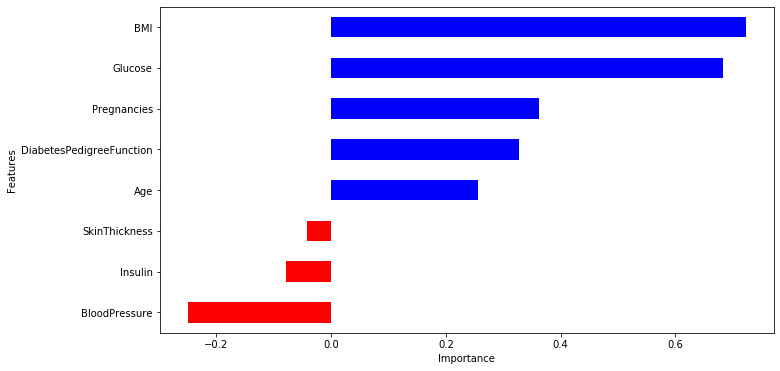

In [11]:
coeff = list(modelDC.coef_[0])
labels = list(df_Train.drop('Outcome',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')


### From the above figure, we can draw the following conclusions.
<ul>
    <li>Glucose level, BMI, pregnancies and diabetes pedigree function have significant influence on the model, specially glucose level and BMI. It is good to see our machine learning model match what we have been hearing from doctors our entire lives!</li><br>
    <li>Blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic. (also, note that blood pressure is more important as a feature than age, because the magnitude is higher for blood pressure).</li><br>
    <li>Although age was more correlated than BMI to the output variables (as we saw during data exploration), the model relies more on BMI. This can happen for several reasons, including the fact that the correlation captured by age is also captured by some other variable, whereas the information captured by BMI is not captured by other variables.</li></ul>

Note that this above interpretations require that our input data is normalized. Without that, we can’t claim that importance is proportional to weights.

### Saving the Model

Now we will save our trained model for future use using `joblib`.

In [12]:
joblib.dump([modelDC, means, stds], 'diabeteseModel.pkl')

['diabeteseModel.pkl']

#### To check whether we have saved the model properly or not, we will use our test data to check the accuracy of our saved model (we should observe no change in accuracy if we have saved it properly).

In [13]:
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  81.0 %


### Making Predictions with the model

We will now use our unused data to see how predictions can be made. We have our unused data in dfCheck.

In [14]:
df_Check.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,6,190,92,0,0,35.5,0.278,66,1
751,3,191,68,15,130,30.9,0.299,34,0
752,3,193,70,31,0,34.9,0.241,25,1
753,1,193,50,16,375,25.9,0.655,24,0
754,6,194,78,0,0,23.5,0.129,59,1


In [15]:
# Sample data to predict 
sampleData=df_Check[:1]
# prepare sample
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds

In [16]:
# predict
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.11846445 0.88153555]]
prediction: [1]


#### The first element of array predictionProbability 0.1184 is the probability of the class being 0 and second element 0.8815 is the probability of the class being 1. The probabilities sum to 1. As we can see that the 1 is more probable class, we get [1] as our prediction, which means that the model predicts that the person has diabetes.

### Drop less correlated features

In [17]:
newData=df_diabetes[['BMI','Glucose','Pregnancies','DiabetesPedigreeFunction','Age','Outcome']]

# Split the data in train and test for both features and target
new_Train=newData[:650]
new_Test=newData[650:750]
new_Check=newData[750:]

# seperate features and target for both train and test 
trainLabel=np.asarray(new_Train['Outcome'])
trainData=np.asarray(new_Train.drop(['Outcome'],1))
testLabel=np.asarray(new_Test['Outcome'])
testData=np.asarray(new_Test.drop(['Outcome'],1))
# Prepare feature
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

trainData = (trainData - means)/stds
testData = (testData - means)/stds


### Train the model 

In [18]:
newModel=LogisticRegression()
newModel.fit(trainData,trainLabel)

C:\Users\GOVINDA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Let's Check model accuracy

In [19]:
accuracy = newModel.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  81.0 %


### As we can see accuracy is same after dropping less correlated features. now let's try to imporve accuracy by filling missing values.

In [20]:
newData.head()

,BMI,Glucose,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
0,24.7,0,1,0.140,22,0
1,27.7,0,1,0.299,21,0
2,41.0,0,5,0.346,37,1
3,32.0,0,1,0.389,22,0
4,39.0,0,6,0.727,41,1


In [21]:
newData.describe()

,BMI,Glucose,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,31.992578,120.894531,3.845052,0.471876,33.240885,0.348958
std,7.884160,31.972618,3.369578,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,27.300000,99.000000,1.000000,0.243750,24.000000,0.000000
50%,32.000000,117.000000,3.000000,0.372500,29.000000,0.000000
75%,36.600000,140.250000,6.000000,0.626250,41.000000,1.000000
max,67.100000,199.000000,17.000000,2.420000,81.000000,1.000000


#### Replace missing values 0 with mean of variable`

In [22]:
newData=newData.replace({'Glucose': {0: newData.Glucose.mean()}}) 
newData=newData.replace({'Pregnancies':{0:newData.Pregnancies.mean()}})
newData=newData.replace({'BMI':{0:newData.BMI.mean()}})
newData.head()

,BMI,Glucose,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
0,24.7,120.894531,1.0,0.140,22,0
1,27.7,120.894531,1.0,0.299,21,0
2,41.0,120.894531,5.0,0.346,37,1
3,32.0,120.894531,1.0,0.389,22,0
4,39.0,120.894531,6.0,0.727,41,1


### Split the data in train,valid,test set

In [23]:
# Train,test and valid data seperation
valid_fraction = 0.1
# clicks_srt = data.sort_values('click_time')
valid_rows = int(len(newData) * valid_fraction)
train = newData[:-valid_rows * 2]
# valid size == test size, last two sections of the data
valid = newData[-valid_rows * 2:-valid_rows]
test = newData[-valid_rows:]

#### Seperate features and target variable

In [24]:
train_target=np.asarray(train['Outcome'])
train_features=np.asarray(train.drop('Outcome',axis=1))#axis 1 for column
test_target=np.asarray(test['Outcome'])
test_features=np.asarray(test.drop('Outcome',axis=1))
validtarget=np.asarray(test['Outcome'])
validfeatures=np.asarray(test.drop('Outcome',axis=1))
# Prepare feature
means = np.mean(train_features, axis=0)
stds = np.std(train_features, axis=0)

train_features = (train_features - means)/stds
test_features = (test_features - means)/stds
validfeatures=(validfeatures-means)/stds
print(type(means))
print(stds)

<class 'numpy.ndarray'>
[ 6.70107541 19.76085268  2.91810746  0.30521125 11.4217489 ]


### Train the model

In [25]:
model=LogisticRegression()
model.fit(train_features,train_target)

C:\Users\GOVINDA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Test the Accuracy of model

In [26]:
accuracy=model.score(validfeatures,validtarget)
print("accuracy = ", accuracy * 100, "%")

accuracy =  86.8421052631579 %


#### Wow imporved accuracy from 81% to 86.84%!

In [27]:
# Dump the model with means and stds for future prediction
joblib.dump([model, means, stds], 'new.pkl')

['new.pkl']

### test the model if saved well or not load save model and make prediction with valid data

In [29]:
diabetesLoadedModel, means, stds = joblib.load('new.pkl')
# test_features=(test_features-means)/stds
accuracyModel = diabetesLoadedModel.score(test_features, test_target)
print("accuracy= ",accuracyModel*100,"%")


accuracy=  86.8421052631579 %
